In [1]:

from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
X.shape

(100, 2)

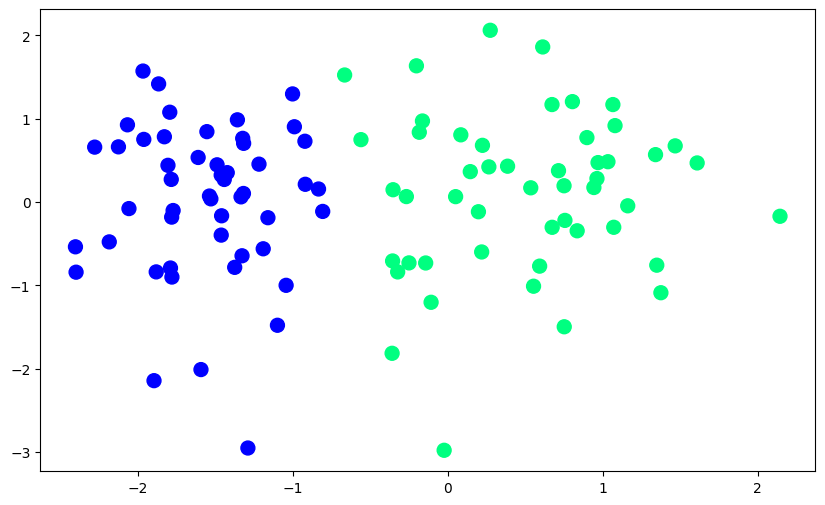

In [4]:


plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)


In [5]:
X.shape[1]

2

In [6]:
X.shape

(100, 2)

In [7]:
import numpy as np

def step_function(x):
  return 1 if x >= 0 else 0  ## activation function: returns 1 if input is >= 0, else returns 0

def perceptron(X, y, learning_rate=0.01, epochs=100):
  n_samples, n_features = X.shape  ## n_samples = number of data points (rows), n_features = number of features (columns)

  weights = np.zeros(n_features)  ## initialize weights for each feature to zero
  bias = 0  ## initialize bias to zero

  for epoch in range(epochs):  ## repeat the training process for a number of epochs
    for i in range(n_samples):  ## iterate through each data point in the dataset

      z = np.dot(weights, X[i]) + bias  ## compute the linear combination (weighted sum) of inputs + bias
      y_pred = step_function(z)  ## apply step function to determine the predicted class (0 or 1)

      error = y[i] - y_pred  ## calculate the prediction error (difference between actual and predicted label)

      weights = weights + learning_rate * error * X[i]  ## update weights based on error, learning rate, and input features
      bias = bias + learning_rate * error  ## update bias based on error and learning rate

  return weights, bias  ## return the final learned weights and bias after training


In [8]:
perceptron(X,y)

(array([0.08644938, 0.00604957]), np.float64(0.07))

In [9]:
weights, bias = perceptron(X,y)

In [10]:
m = weights[0] / weights[1]   ## slope (m) of the decision boundary line calculated using weight[0] and weight[1]
                             ## since the decision boundary is defined by w1*x1 + w2*x2 + b = 0,
                             ## we can rewrite it as x2 = -(w1/w2)*x1 - (b/w2), which is in the form y = mx + b
                             ## therefore, slope m = -w1/w2 → here just taking w1/w2 and plotting line accordingly

b = bias / weights[1]        ## intercept with y-axis (b) from the rearranged line equation above
                             ## from x2 = -(w1/w2)*x1 - (b/w2), the intercept is at -b/w2
                             ## here we're using positive b/w2 to match the form y = mx + c when plotting


In [11]:
print(m)
print(b)

14.290162816848829
11.571064463264047


In [12]:
x= np.linspace(-3,3,100)
y_line= m*x +b

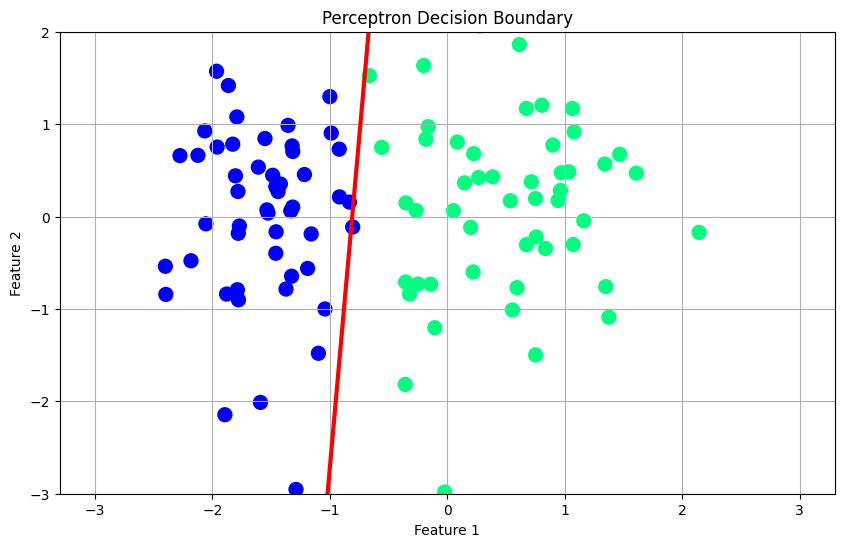

In [13]:
plt.figure(figsize=(10,6))

# Plot the decision boundary
plt.plot(x, y_line, color='red', linewidth=3)

# Scatter plot with correct class labels as color
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

plt.ylim(-3, 2)
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
